In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.tree as tree
import sklearn.metrics as mt
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

Spliting datasets

In [28]:
train_set = pd.read_csv('train_new.csv')
test_set = pd.read_csv('test_new.csv')

In [29]:
train_set.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,family,age_class,Survived
0,1,3,0,22.0,1,0,7.2500,0.0,1,1,0
1,2,1,1,38.0,1,0,71.2833,1.0,1,1,1
2,3,3,1,26.0,0,0,7.9250,0.0,0,1,1
3,4,1,1,35.0,1,0,53.1000,0.0,1,1,1
4,5,3,0,35.0,0,0,8.0500,0.0,0,1,0


In [30]:
test_set.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,family,age_class
0,892,3,0,34.5,0,0,7.8292,2,0,1
1,893,3,1,47.0,1,0,7.0000,0,1,1
2,894,2,0,62.0,0,0,9.6875,2,0,2
3,895,3,0,27.0,0,0,8.6625,0,0,1
4,896,3,1,22.0,1,1,12.2875,0,1,1


In [31]:
new = pd.to_numeric(train_set['Embarked'],downcast='integer')
train_set.drop('Embarked',axis = 1, inplace=True)
train_set['Embarked']=new

In [32]:
train_set.drop('PassengerId',axis=1,inplace=True)

In [10]:
train_set.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,family,age_class,Survived,Embarked
0,3,0,22.0,1,0,7.2500,1,1,0,0.0
1,1,1,38.0,1,0,71.2833,1,1,1,1.0
2,3,1,26.0,0,0,7.9250,0,1,1,0.0
3,1,1,35.0,1,0,53.1000,1,1,1,0.0
4,3,0,35.0,0,0,8.0500,0,1,0,0.0


In [33]:
test_set.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,family,age_class
0,892,3,0,34.5,0,0,7.8292,2,0,1
1,893,3,1,47.0,1,0,7.0000,0,1,1
2,894,2,0,62.0,0,0,9.6875,2,0,2
3,895,3,0,27.0,0,0,8.6625,0,0,1
4,896,3,1,22.0,1,1,12.2875,0,1,1


In [34]:
x_train = train_set[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','family','age_class']]
y_train = train_set['Survived']

In [35]:
y_test = pd.DataFrame(test_set['PassengerId'])
test_set.drop(['PassengerId'],axis=1,inplace=True)
x_test = test_set


## MACHINE LEARNING

#Seting parameters

#DecisionTree

In [36]:
model = tree.DecisionTreeClassifier()
parameters = {'criterion':['gini','entropy'],'min_samples_split':[2,5,10],'min_samples_leaf':[1,3,5], 'max_depth':[2,5,10]}

clf = GridSearchCV(model,param_grid=parameters);
clf.fit(x_train,y_train);
print(f'Parameter: {clf.best_params_}, best score {clf.best_score_}');

Parameter: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}, best score 0.8215742891218379


In [166]:
model = tree.DecisionTreeClassifier(criterion= 'gini',max_depth=13, min_samples_split=3, min_samples_leaf=1)
model.fit(x_train, y_train)
pred = model.predict(x_train)
mt.accuracy_score(y_train,pred)

0.9528619528619529

Prunning

In [38]:
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x_train,y_train,random_state=0)

In [39]:
model = tree.DecisionTreeClassifier(criterion= 'entropy',max_depth=10, min_samples_split=2, min_samples_leaf=3)
prn = model.cost_complexity_pruning_path(x_train_2, y_train_2)
ccp_alphas = prn.ccp_alphas

In [40]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(criterion= 'entropy',max_depth=10, min_samples_split=2, min_samples_leaf=3,random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train_2, y_train_2)
    clfs.append(clf)

In [41]:
train_scores=[clf.score(x_train_2,y_train_2) for clf in clfs]
test_scores=[clf.score(x_test_2,y_test_2) for clf in clfs]

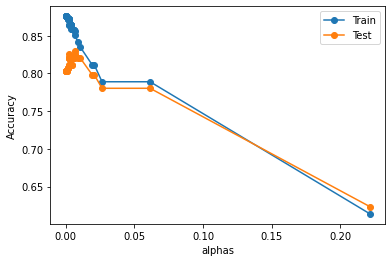

In [42]:
plt.plot(ccp_alphas,train_scores,'-o',label='Train')
plt.plot(ccp_alphas,test_scores,'-o',label='Test')
plt.xlabel('alphas')
plt.ylabel('Accuracy')
plt.legend()

#Random Forest

In [114]:
model_2 = RandomForestClassifier()

parameters = {'n_estimators':[30,50,100],'criterion':['gini','entropy'], 'max_depth':[1,2,5,10],'min_samples_split':[2,5,10],'min_samples_leaf':[1,3,5]}

clf_2 = GridSearchCV(model_2,param_grid=parameters);
clf_2.fit(x_train,y_train);
print(f'Parameter: {clf_2.best_params_}, best score {clf_2.best_score_}');


Parameter: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}, best score 0.8350260498399347


In [115]:
model2 = RandomForestClassifier(criterion= 'entropy',max_depth=15, min_samples_split=5, min_samples_leaf=3,n_estimators=60,random_state=0)
model2.fit(x_train, y_train)
pred = model2.predict(x_train)
mt.accuracy_score(y_train,pred)

0.9012345679012346

#KNN

In [48]:
model_3 = KNeighborsClassifier()
parameters = {'metric':['euclidean','minkowski','chebyshev'], 'n_neighbors':[3,5,10],'p':[1,2]}

clf_3 = GridSearchCV(model_3,param_grid=parameters);
clf_3.fit(x_train,y_train);
print(f'Parameter: {clf_3.best_params_}, best score {clf_3.best_score_}');

Parameter: {'metric': 'minkowski', 'n_neighbors': 3, 'p': 1}, best score 0.7183102127926684


#SVM

In [54]:
model_4 = SVC()

parameters = {'kernel':['linear','rbf','poly','sigmoid'],'C': [1,1.5,2],'tol':[0.001,0.0001,0.00001]}

clf_4 = GridSearchCV(model_4,param_grid=parameters);
clf_4.fit(x_train,y_train);
print(f'Parameter: {clf_4.best_params_}, best score {clf_4.best_score_}');

Parameter: {'C': 1.5, 'kernel': 'linear', 'tol': 0.001}, best score 0.8080660347749671


In [125]:
model_4 = SVC(kernel='linear',C=1, tol = 0.001)
model_4.fit(x_train, y_train)
pred = model_4.predict(x_train)
mt.accuracy_score(y_train,pred)

0.8159371492704826

#Neural_Network

In [55]:
model_5 = MLPClassifier()

parameters = {'max_iter':[1000],'tol':[0.0001,0.00001],'hidden_layer_sizes':[(5,5),(50,50)],'learning_rate':['adaptive'],'batch_size':[10,50]}

clf_5 = GridSearchCV(model_5,param_grid=parameters);
clf_5.fit(x_train,y_train);
print(f'Parameter: {clf_5.best_params_}, best score {clf_5.best_score_}');

Parameter: {'batch_size': 50, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'adaptive', 'max_iter': 1000, 'tol': 1e-05}, best score 0.8058251208335949


In [145]:
model_5 = MLPClassifier(activation = 'tanh',batch_size= 40, hidden_layer_sizes= (100, 100), learning_rate= 'adaptive', max_iter= 1000, tol= 1e-05,random_state=0)
model_5.fit(x_train, y_train)
pred = model_5.predict(x_train)
mt.accuracy_score(y_train,pred)

0.8597081930415263

#Cross Validation

In [179]:
tree_results = []
RF_results = []
KNN_results = []
SVM_results = []
NN_results = []

for i in range(15):
  kfold = KFold(n_splits=10,shuffle=True,random_state=i)
  #Decision Tree
  tree_model = tree.DecisionTreeClassifier(criterion= 'gini',max_depth=13, min_samples_split=3, min_samples_leaf=1)
  tree_scores = cross_val_score(tree_model, x_train, y_train, cv=kfold)
  tree_results.append(tree_scores.mean())
  #Random Forest
  RF_model = RandomForestClassifier(criterion= 'entropy',max_depth=15, min_samples_split=5, min_samples_leaf=3,n_estimators=60)
  RF_scores = cross_val_score(RF_model, x_train, y_train, cv=kfold)
  RF_results.append(RF_scores.mean())
  #KNN
  KNN_model = KNeighborsClassifier(metric= 'minkowski',n_neighbors=3, p=1)
  KNN_scores = cross_val_score(KNN_model, x_train, y_train, cv=kfold)
  KNN_results.append(KNN_scores.mean())
  #SVM
  SVM_model = SVC(kernel='linear',C=1, tol = 0.001)
  SVM_scores = cross_val_score(SVM_model, x_train, y_train, cv=kfold)
  SVM_results.append(SVM_scores.mean())
  #NN
  NN_model = MLPClassifier(activation = 'tanh',batch_size= 40, hidden_layer_sizes= (100, 100), learning_rate= 'adaptive', max_iter= 1000, tol= 1e-05)
  NN_scores = cross_val_score(NN_model, x_train, y_train, cv=kfold)
  NN_results.append(NN_scores.mean())

In [180]:
final_results = pd.DataFrame({'DecisionTree': tree_results,'RandomForest': RF_results,'KNN': KNN_results,'SVM': SVM_results,'NeuralNetwork': NN_results})
final_results

,DecisionTree,RandomForest,KNN,SVM,NeuralNetwork
0,0.790150,0.829376,0.730674,0.812572,0.789014
1,0.798002,0.827191,0.730662,0.808140,0.801423
2,0.793496,0.829438,0.738602,0.804744,0.789064
3,0.800175,0.830537,0.717203,0.809164,0.804707
4,0.792310,0.830474,0.731660,0.812534,0.802409
5,0.781186,0.822734,0.728352,0.810337,0.792360
6,0.778889,0.830512,0.741873,0.811436,0.791199
7,0.786754,0.832809,0.721623,0.813708,0.789014
8,0.791336,0.828340,0.736342,0.805918,0.798140
9,0.782297,0.826042,0.725031,0.811461,0.804707


New_train set

In [181]:
final_results.describe()

,DecisionTree,RandomForest,KNN,SVM,NeuralNetwork
count,15.000000,15.000000,15.000000,15.000000,15.000000
mean,0.786758,0.829109,0.730578,0.810999,0.796113
std,0.007283,0.003772,0.007637,0.002878,0.007761
min,0.775543,0.822622,0.717203,0.804744,0.784444
25%,0.781723,0.826617,0.725044,0.809750,0.790131
50%,0.785581,0.829438,0.730662,0.811461,0.794582
75%,0.791823,0.830549,0.735737,0.812572,0.801916
max,0.800175,0.836092,0.744107,0.814819,0.812597


predict

In [167]:
results = pd.DataFrame()
#Random forest
clf_rf = RandomForestClassifier(criterion= 'entropy',max_depth=15, min_samples_split=5, min_samples_leaf=3,n_estimators=60,random_state=0)
clf_rf.fit(x_train, y_train)
results['RandomForest'] = clf_rf.predict(x_test)
#SVM
clf_svm = SVC(kernel='linear',C=1, tol = 0.001)
clf_svm.fit(x_train, y_train)
results['SVM'] = clf_svm.predict(x_test)
#NeuralNetwork
clf_nn = MLPClassifier(activation = 'tanh',batch_size= 40, hidden_layer_sizes= (100, 100), learning_rate= 'adaptive', max_iter= 1000, tol= 1e-05,random_state=0)
clf_nn.fit(x_train, y_train)
results['NeuralNetwork'] = clf_nn.predict(x_test)

In [183]:
sums = pd.DataFrame()
sums['s'] =pd.DataFrame(results['NeuralNetwork']+results['RandomForest']+results['SVM'])


In [184]:
results['final'] = 0
results['final'].loc[sums['s']>=2] = 1 

In [ ]:
results.drop('DecisionTree',axis)

In [186]:
results.head()

,DecisionTree,RandomForest,SVM,NeuralNetwork,final
0,0,0,0,0,0
1,0,0,1,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,1,1,1,1


In [177]:
pred_final = results['final']
#x_test['Survived'] = pred_final
np.unique(pred_final, return_counts=True)


(array([0, 1]), array([251, 167]))

In [178]:
y_test['Survived'] = pred_final
y_test.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [176]:
y_test.to_csv('final_results.csv',index=False)